# PROJECT ON LINEAR REGRESSION  
                    MULTIPLE LINEAR REGRESSION.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [57]:
df = pd.read_csv('new.txt')

In [58]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [59]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


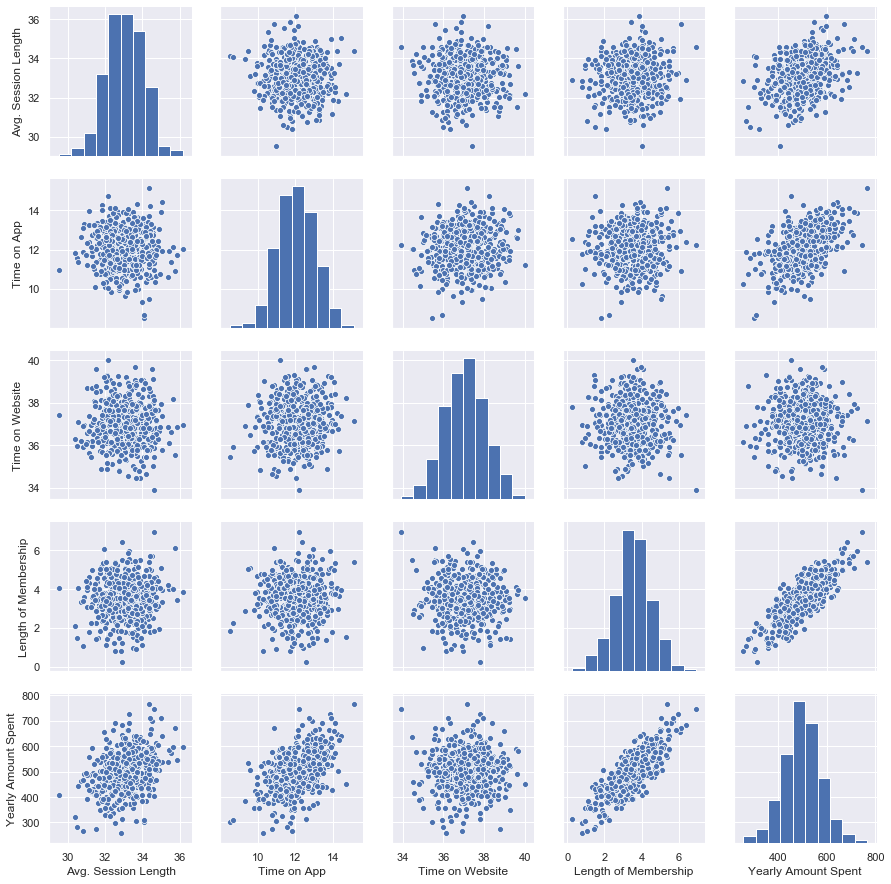

In [61]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(df)

In [62]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

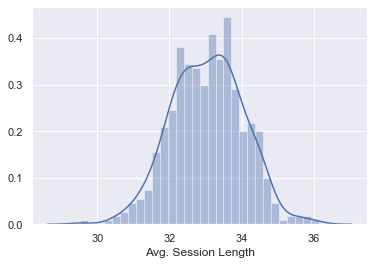

In [63]:
sns.distplot(df['Avg. Session Length'], bins= 30)

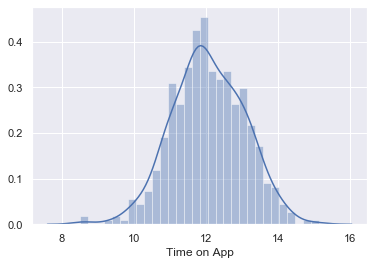

In [64]:
sns.distplot(df['Time on App'], bins= 30)

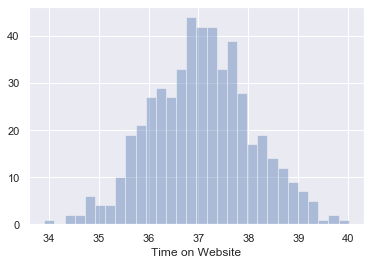

In [65]:
sns.distplot(df['Time on Website'], bins= 30, kde=False)

In [66]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

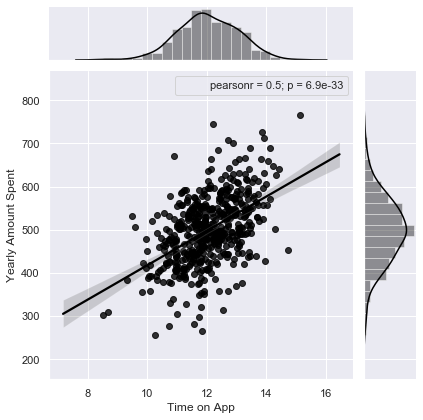

In [69]:
sns.jointplot(x= 'Time on App',y='Yearly Amount Spent', kind= 'reg', data =df, color = 'black' ).annotate(stats.pearsonr)

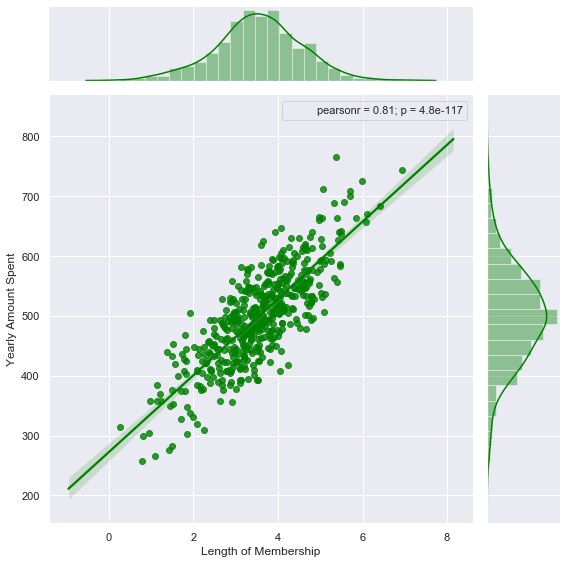

In [68]:

sns.jointplot (x='Length of Membership', y= 'Yearly Amount Spent', data = df, kind = 'reg', color = 'green',height=8 ).annotate(stats.pearsonr)

In [70]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [71]:
X= df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [72]:
y= df['Yearly Amount Spent']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lm= LinearRegression()

In [77]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lm.coef_

array([26.18401981, 38.98567837,  0.49306384, 61.58933793])

In [79]:
predictions= lm.predict(X_test)

Text(0.5, 0, 'Y test (True Values)')

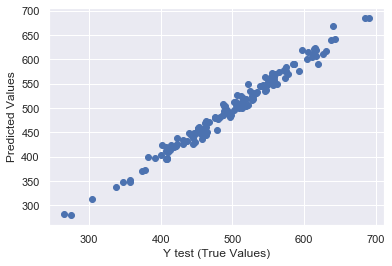

In [88]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted Values')
plt.xlabel('Y test (True Values)')

   # Evaluating the Model

In [89]:
from sklearn import metrics

In [94]:
print ('MAE =', metrics.mean_absolute_error(y_test, predictions))
print ('MSE =', metrics.mean_squared_error(y_test, predictions))
print ('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE = 7.73972217438689
MSE = 99.2177216163043
RMSE =  9.960809285208923


In [95]:
metrics.explained_variance_score(y_test,predictions)

0.9833961385895834

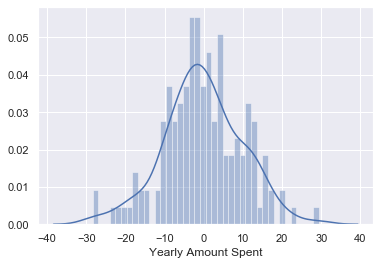

In [96]:
sns.distplot((y_test - predictions), bins=40)

In [98]:
 CDF= pd.DataFrame (lm.coef_ , X.columns, columns = ['Coeff'] )
CDF

,Coeff
Avg. Session Length,26.184020
Time on App,38.985678
Time on Website,0.493064
Length of Membership,61.589338
